Guide: https://colab.research.google.com/drive/1o5A5dNhamjcOEgaA9FKM4OmlAZS84Z5o#scrollTo=f8f60b87
Exercise: https://4geeks.com/es/syllabus/spain-ds-pt-3/project/tutorial-de-proyecto-de-regresion-lineal

📝 Instrucciones
Predecir el coste del seguro médico de una persona
La importante compañía de seguros 4Geeks Insurance S.L. quiere calcular, en función de datos fisológicos de sus clientes cuál va a ser la prima (coste) que debe asumir cada uno de ellos. Para ello, ha reunido a un equipo completo de médicos y en función de datos de otras compañías y un estudio particular han logrado reunir un conjunto de datos para entrenar un modelo predictivo. Calcular el coste del seguro médico de una persona (Charges) en funcion de los datos fisológicos de sus clientes, es decir, la prima que debe asumir cada uno de los clientes.

Variables:

age. Edad del beneficiario principal (numérico)
sex. Género del beneficiario principal (categórico)
bmi. Indice de masa corporal (numérico)
children. Número de niños/dependientes cubiertos por el seguro de salud (numérico)
smoker. ¿Es fumador? (categórico)
region. Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)
charges. Prima del seguro médico (numerico)

Data Ingestion

In [3]:
import pandas as pd
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
total_data = pd.read_csv(url)
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
Stage 1: Analisis Estadístico de los datos

🕵️‍♀️Paso 1. Exploracion y limpieza de datos

In [4]:
# Obtener las dimensiones
total_data.shape

(1338, 7)

In [6]:
# Obtener información sobre tipos de datos y valores no nulos
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


✅Existen un total de 1338 filas distribuidas en 7 columnas. Entre las que encontramos la clase target a predecir, charges 
✅Los datos cuenta con 4 características númericas y 3 categóricas

In [8]:
#Eliminación de valores duplicados
duplicates = total_data[total_data.duplicated()]
print("Valores duplicados:")
print(duplicates)

total_data = total_data.drop_duplicates()
print("Valores duplicados eliminados:")

Valores duplicados:
     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631
Valores duplicados eliminados:


In [ ]:
#Eliminación de información relevante
#En este caso no aplica 👉 Mantenemos todas las columas de dataset

Análisis de medidas de tendencia central, dispersión, posición y formas

In [11]:
#Análisis de media, moda, std y percentiles sobre los valores numéricos
total_data = pd.DataFrame(total_data)

# Filtra solo las columnas numéricas
columnas_numericas = total_data.select_dtypes(include=['int64', 'float64'])

# Media
media = columnas_numericas.mean()
print("Media:")
print(media)

# Moda
moda = columnas_numericas.mode().iloc[0]  # Puede haber múltiples modas
print("\nModa:")
print(moda)

# Desviación Estándar
desviacion_estandar = columnas_numericas.std()
print("\nDesviación Estándar:")
print(desviacion_estandar)

# Percentiles
percentiles = [0.25, 0.50, 0.75]
percentiles_resultados = columnas_numericas.quantile(percentiles)
print("\nPercentiles:")
print(percentiles_resultados)

Media:
age            39.222139
bmi            30.663452
children        1.095737
charges     13279.121487
dtype: float64

Moda:
age           18.0000
bmi           32.3000
children       0.0000
charges     1121.8739
Name: 0, dtype: float64

Desviación Estándar:
age            14.044333
bmi             6.100468
children        1.205571
charges     12110.359656
dtype: float64

Percentiles:
       age    bmi  children      charges
0.25  27.0  26.29       0.0   4746.34400
0.50  39.0  30.40       1.0   9386.16130
0.75  51.0  34.70       2.0  16657.71745


🕵️‍♀️ Stage 2: Análisis exploratorio de datos

2.1 Análisis univariante (columna a columna)

In [18]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Análisis univariable categórico

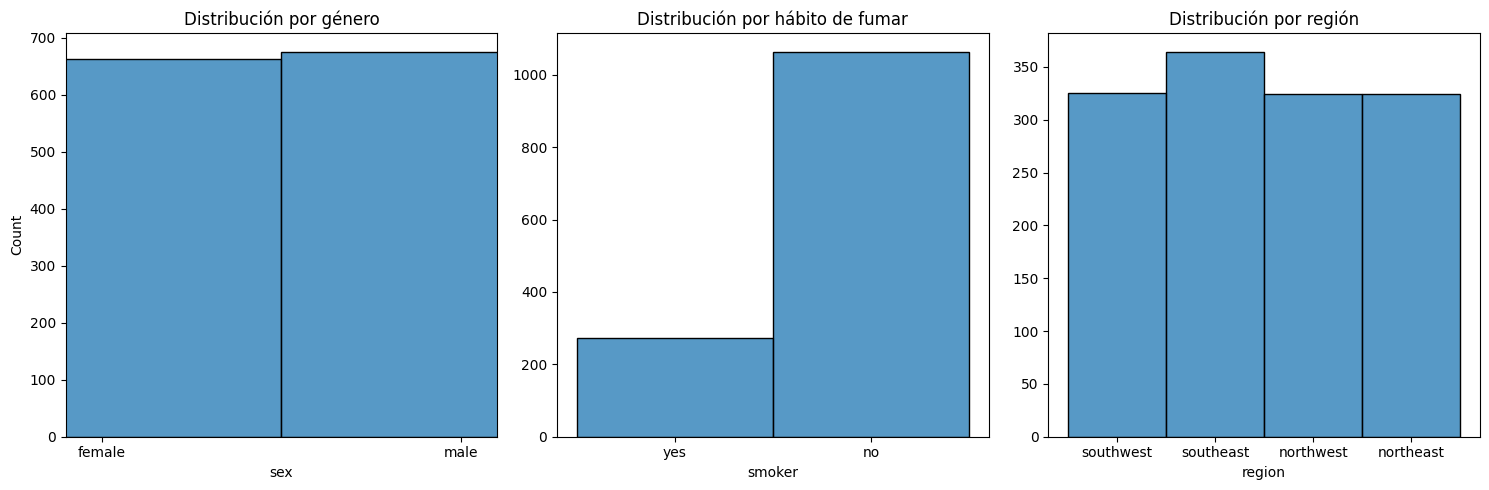

In [22]:

import matplotlib.pyplot as plt
import seaborn as sns

# Crear un subplot con tres histogramas
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histograma para 'sex'
sns.histplot(ax=axes[0], data=total_data, x="sex").set_xlim(-0.1, 1.1)
axes[0].set_title('Distribución por género')

# Histograma para 'smoker'
sns.histplot(ax=axes[1], data=total_data, x="smoker").set(ylabel=None)
axes[1].set_title('Distribución por hábito de fumar')

# Histograma para 'region'
sns.histplot(ax=axes[2], data=total_data, x="region").set(ylabel=None)
axes[2].set_title('Distribución por región')

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


Conclusiones del análisis univariable categórico
✅La distribución por género es bastante similar, si bien que la muestra de hombres es sensiblemente superior a la muestra de mujeres,
✅La ditribución por hábito de fumar es significativa, el número de no fumadores casi cuadriplica al de fumadores
✅La distribución por regíon es simetrica entre southwest, northwest y northeast y es sensiblemente superior en el caso de southeast

Análisis univariable numérico

In [23]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


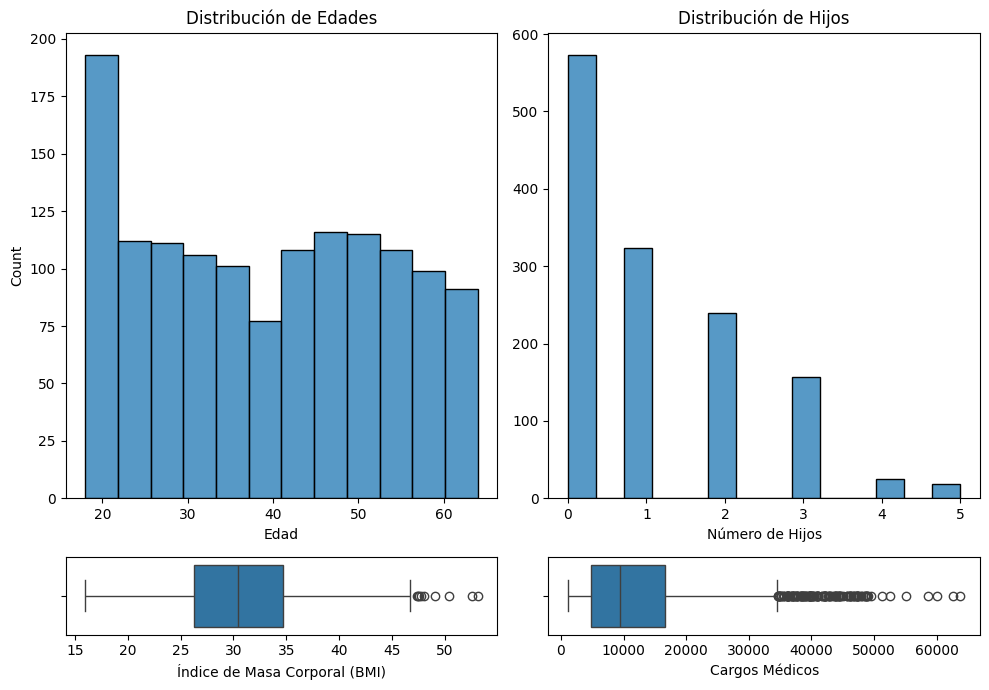

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura múltiple con histogramas y diagramas de caja
fig, axis = plt.subplots(2, 2, figsize=(10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Histograma para 'age'
sns.histplot(ax=axis[0, 0], data=total_data, x="age").set(xlabel=None)
axis[0, 0].set_title('Distribución de Edades')
axis[0, 0].set_xlabel('Edad')

# Boxplot para 'bmi'
sns.boxplot(ax=axis[1, 0], data=total_data, x="bmi")
axis[1, 0].set_xlabel('Índice de Masa Corporal (BMI)')

# Histograma para 'children'
sns.histplot(ax=axis[0, 1], data=total_data, x="children").set(xlabel=None, ylabel=None)
axis[0, 1].set_title('Distribución de Hijos')
axis[0, 1].set_xlabel('Número de Hijos')

# Boxplot para 'charges'
sns.boxplot(ax=axis[1, 1], data=total_data, x="charges")
axis[1, 1].set_xlabel('Cargos Médicos')

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


Conclusiones del análisis univariable numérico:
✅Edad: Claramente aparecen un mayor número de veinteañeros en la muestra
✅Número de hijos: La muestra contiene un mayor número de 0 hijos y va decreciendo
✅BMI: Parecen existir outliers entre 47 y 57 
✅Cargos Médicos (charges): La mayor concentración se produce entre 10000 y 15000, existiendo outliers por encima de 60000, parecen no existir valroes entre 15000 y 35000

2.2 Análisis multivariante (Análisis de variables en relación con la predictora, es decir dependiente con independientes)